In [1]:
import xgboost
#forest = xgboost.XGBClassifier(n_estimators=100, max_depth=2)
from sklearn.linear_model import SGDClassifier

/Users/yoo/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import log_loss,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [546]:
import json
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
import statsmodels.stats.api as sms
import numpy as np



# read train data
with open('./data/train_data.json') as fp:
    json_str = fp.read()
    json_train = json.loads(json_str)
    
with open('./data/test.input.json') as fp:
    json_str = fp.read()
    json_test = json.loads(json_str)
    
with open('./data/test.output') as fp:
    test_out = fp.read()
    test_out = test_out.splitlines()
#     json_testout = json.loads(json_str)    

In [547]:
# train data 전처리

train_lst = []
train_row = {}
for i in range(len(json_train)):
    for j, player in enumerate(json_train[i]['participants']): # 그 경기 내에 참여자들
        train_row['champId_'+str(j)] = player['championId'] # 참여자의 champid
        train_row['player_'+str(j)] = player['summonerId'] # 참여자의 smid 
        
    train_row['target'] = json_train[i]['teams'][0]['winner'] # 그 경기에서 100번팀의 승리 여부
    
                  
    train_lst.append(train_row) # 한 경기 참여자들을 모두 lst의 row로
    train_row = {}
    
train_df = pd.DataFrame(train_lst)

In [539]:
# test data 전처리

test_lst = []
test_row = {}
for i in range(len(json_test)):
    for j, player in enumerate(json_test[i]['participants']): # 그 경기 내에 참여자들
        test_row['champId_'+str(j)] = player['championId'] # 참여자의 champid
        test_row['player_'+str(j)] = player['summonerId'] # 참여자의 smid 
        
    #test_row['win_100'] = json_test[i]['teams'][0]['winner'] # 그 경기에서 100번팀의 승리 여부
    
                  
    test_lst.append(test_row) # 한 경기 참여자들을 모두 lst의 row로
    test_row = {}
    
test_df = pd.DataFrame(test_lst)
test_df['target'] = test_out
test_df['target'] = test_df['target'].map(lambda x: True if x == '100' else False)

In [528]:
train_df.columns

Index(['champId_0', 'champId_1', 'champId_2', 'champId_3', 'champId_4',
       'champId_5', 'champId_6', 'champId_7', 'champId_8', 'champId_9',
       'player_0', 'player_1', 'player_2', 'player_3', 'player_4', 'player_5',
       'player_6', 'player_7', 'player_8', 'player_9', 'target'],
      dtype='object')

In [529]:
test_df.columns

Index(['champId_0', 'champId_1', 'champId_2', 'champId_3', 'champId_4',
       'champId_5', 'champId_6', 'champId_7', 'champId_8', 'champId_9',
       'player_0', 'player_1', 'player_2', 'player_3', 'player_4', 'player_5',
       'player_6', 'player_7', 'player_8', 'player_9', 'target'],
      dtype='object')

In [530]:
train_df.shape ,test_df.shape

((38679, 21), (2000, 21))

In [ ]:
# 모델링

In [19]:
col = ['champId_0', 'champId_1', 'champId_2', 'champId_3', 'champId_4',
       'champId_5', 'champId_6', 'champId_7', 'champId_8', 'champId_9',
       'player_0', 'player_1', 'player_2', 'player_3', 'player_4', 'player_5',
       'player_6', 'player_7', 'player_8', 'player_9']

X = train_df[col]
y = train_df['target']
from sklearn.model_selection import cross_val_score

cv = KFold(2)

forest = ExtraTreesClassifier(n_estimators=100)
#forest = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

score = cross_val_score(forest, X, y, scoring="accuracy", cv=cv)

print(score)
print(score.mean())
print(score.std())

[ 0.78185109  0.77687574]
0.779363414575
0.00248767125793


In [ ]:
y_pred = forest.predict(test_df[col])

test_y = test_df['target']

accuracy_score(test_y,y_pred)

In [ ]:
import json
import requests
import urllib



with urllib.request.urlopen('http://ddragon.leagueoflegends.com/cdn/6.24.1/data/en_US/champion.json') as response:
   champion_info = json.loads(response.read())

In [20]:
#lst_1 은 1팀, 2는 2팀, lst 는 전부
row = []
lst = []
lst_1 = []
lst_2 = []

for i in range(len(train_df)):
    #print(i)
    for j in range(5):
        row.append(train_df['champId_'+str(j)][i])
    #print('champId_'+str(i))
    #row.append(train_df['target'][i])
    lst_1.append(row)
    row = []

row = []
lst = []
for i in range(len(train_df)):
    #print(i)
    for j in range(5,10):
        row.append(train_df['champId_'+str(j)][i])
    #print('champId_'+str(i))
    #row.append(train_df['target'][i])    
    lst_2.append(row)
    row= []
   
row = []
lst = []
for i in range(len(train_df)):
    #print(i)
    for j in range(10):
        row.append(train_df['champId_'+str(j)][i])
    #print('champId_'+str(i))
    lst.append(row)
    row= []

In [21]:
len(lst_1), len(lst_2), len(lst)

(38679, 38679, 38679)

In [22]:
for i in range(len(lst_1)):
    lst_1[i] = sorted(lst_1[i])
    
for i in range(len(lst_2)):
    lst_2[i] = sorted(lst_2[i])
    
# for i in range(len(lst)):
#     lst[i] = set(lst[i])

In [23]:
len(np.unique(lst_1)),len(np.unique(lst_2)), len(np.unique(lst))

(125, 125, 125)

In [24]:
for i in range(len(train_df)):
    #print(i)
    lst_1[i].append(train_df['target'][i])
    lst_2[i].append(train_df['target'][i])


In [25]:
te_1 = lst_1.copy()
te_1.sort()
te_2 = lst_2.copy()
te_2.sort()

In [26]:
te_1_df = pd.DataFrame(te_1)

In [27]:
for i in range(len(te_1)):
    te_1[i] = str(te_1[i][:5])

In [28]:
te_1_str_df = pd.DataFrame(te_1)

In [29]:
te_1_str_df.head()

,0
0,"[1, 2, 4, 22, 76]"
1,"[1, 2, 4, 22, 76]"
2,"[1, 2, 4, 22, 76]"
3,"[1, 2, 4, 22, 76]"
4,"[1, 2, 4, 22, 76]"


In [ ]:
print_full(te_1_df[te_1_df[5]==True])

In [ ]:
print_full(te_1_df)

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
    
print_full(te_1_df)

In [ ]:
te_1_df['target'] = train_df['target']
te_1_df.columns = ['champ_cb', 'target']

In [ ]:
te_1_df.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=te_1_df, y=te_1_df.champ_cb)#, hue=te_1_df.target, data=te_1_df)
plt.show()

In [30]:
# group 한 데이터가 얼마나 많이 나오는지 
true_df = train_df[train_df['target']==True].copy()
false_df = train_df[train_df['target']==False].copy()

In [33]:
true_lst = []
false_lst = []
for i in range(len(true_df)):
    true_lst.append(true_df['champId_'+str(j)].iloc[i])

for i in range(len(false_df)):
    false_lst.append(false_df['champId_'+str(j)].iloc[i])
        

In [353]:
true_df = pd.DataFrame(true_lst, columns=['val'])
false_df = pd.DataFrame(false_lst, columns=['val'])

In [458]:
true_300 = true_df.groupby('val').size()[true_df.groupby('val').size() > 0]

In [457]:
false_300 = false_df.groupby('val').size()[false_df.groupby('val').size() > 0]

In [459]:
len(true_300)

125

In [460]:
len(false_300)

125

In [494]:
true_300.loc[64]

571

In [495]:
false_300.loc[64]

574

In [491]:
(false_300-true_300)

186

In [479]:
for i in false_300.index:
    print(true_300.loc[i]/true_300.sum() - false_300.loc[i]/true_300.sum())

0.00101964151551
-0.000482988086294
-0.000482988086294
-0.000160996028765
0.0
-5.36653429215e-05
-0.00300525920361
-0.00134163357304
-0.00171729097349
-0.000751314800902
0.000804980143823
-0.000965976172588
-0.00359557797574
-0.00107330685843
-0.00166362563057
-0.000482988086294
-0.00101964151551
-0.00241494043147
0.000160996028765
-0.000268326714608
-0.00069764945798
-0.00160996028765
-0.00166362563057
-0.00134163357304
0.00327358591821
-0.000375657400451
0.000912310829666
0.00128796823012
0.000590318772137
0.0015026296018
0.000965976172588
-0.000429322743372
-0.000643984115058
0.000268326714608
-0.000965976172588
0.00134163357304
0.000321992057529
0.0012343028872
-0.00558119566384
-0.00740581732317
0.000160996028765
0.00418589674788
-0.000429322743372
-0.000482988086294
0.000643984115058
-0.000214661371686
0.00171729097349
0.00354191263282
0.00257593646023
0.00262960180316
0.000965976172588
-0.000321992057529
0.00252227111731
0.00166362563057
-0.0022539444027
0.000107330685843
0.0033

In [473]:
false_300.sum()

20045

In [472]:
false_300.loc[]

369

In [465]:
for i in false_300.loc[]

17

In [444]:
set(true_300.index)

{8,
 12,
 15,
 25,
 39,
 40,
 42,
 51,
 57,
 64,
 67,
 76,
 81,
 104,
 111,
 117,
 150,
 236,
 412,
 421,
 432}

In [445]:
set(false_300.index)

{8,
 12,
 15,
 22,
 25,
 39,
 40,
 57,
 64,
 67,
 76,
 81,
 104,
 111,
 117,
 150,
 222,
 236,
 412,
 421,
 432}

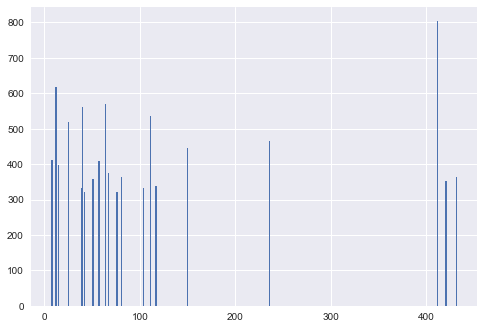

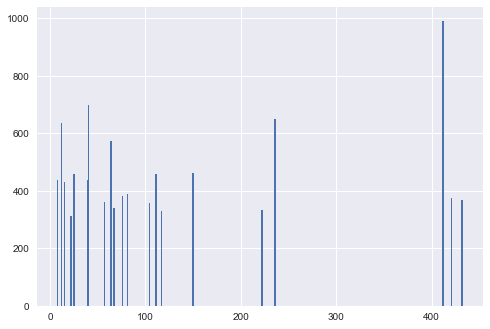

In [451]:
plt.figure(0)
plt.bar(true_300.index, true_300.values,width=1.5)
plt.figure(1)
plt.bar(false_300.index, false_300.values,width=1.5)
plt.show()

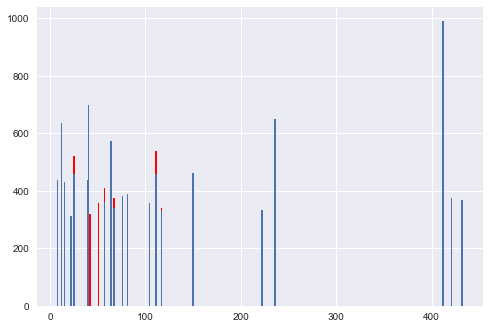

In [449]:

plt.bar(true_300.index, true_300.values,width=1.5,color='r')
plt.bar(false_300.index, false_300.values,width=1.5)
plt.show()

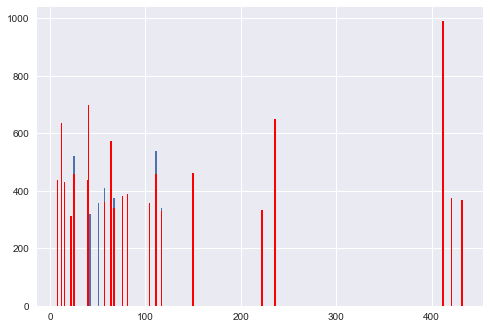

In [450]:

plt.bar(true_300.index, true_300.values,width=1.5)
plt.bar(false_300.index, false_300.values,width=1.5,color='r')
plt.show()

In [382]:
plt.scatter(true_300.index,true_300.0)

SyntaxError: invalid syntax (<ipython-input-382-e400cf67c39d>, line 1)

In [92]:
freq_true = [12,40,64,111,412]

In [509]:
# 자주 나오는 값들의 가능한 2개 조합
import itertools
freq_true_2 = []
for subset in itertools.combinations(true_300.index, 2):
    freq_true_2.append(list(subset))

print(freq_true_2)



# for L in range(0, len(freq_true)+1):
#     for subset in itertools.combinations(freq_true, L):
#         print(subset)

[[1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1, 24], [1, 25], [1, 26], [1, 27], [1, 28], [1, 29], [1, 30], [1, 31], [1, 32], [1, 33], [1, 34], [1, 35], [1, 36], [1, 37], [1, 38], [1, 39], [1, 40], [1, 41], [1, 42], [1, 43], [1, 44], [1, 45], [1, 48], [1, 50], [1, 51], [1, 53], [1, 54], [1, 55], [1, 56], [1, 57], [1, 58], [1, 59], [1, 60], [1, 61], [1, 62], [1, 63], [1, 64], [1, 67], [1, 68], [1, 69], [1, 72], [1, 74], [1, 75], [1, 76], [1, 77], [1, 78], [1, 79], [1, 80], [1, 81], [1, 82], [1, 83], [1, 84], [1, 85], [1, 86], [1, 89], [1, 90], [1, 91], [1, 92], [1, 96], [1, 98], [1, 99], [1, 101], [1, 102], [1, 103], [1, 104], [1, 105], [1, 106], [1, 107], [1, 110], [1, 111], [1, 112], [1, 113], [1, 114], [1, 115], [1, 117], [1, 119], [1, 120], [1, 121], [1, 122], [1, 126], [1, 127], [1, 131], [1, 133], [1, 134], [1, 143], [1, 150], [1, 154], 

In [180]:
train_df.head()

,champId_0,champId_1,champId_2,champId_3,champId_4,champId_5,champId_6,champId_7,champId_8,champId_9,...,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9,target
0,238,412,236,117,20,421,22,103,63,150,...,178,724,553,1577,1406,1535,2448,1420,3440,False
1,64,412,236,76,8,222,268,245,421,12,...,6873,5159,6874,231,5352,1431,6842,3221,2240,False
2,69,64,57,104,40,111,39,15,8,90,...,874,2539,1107,1108,903,2981,2977,1182,626,True
3,107,96,25,222,113,268,245,12,64,236,...,883,225,1836,228,174,191,2331,250,226,True
4,236,76,103,92,89,102,412,101,39,222,...,465,2461,1339,2670,422,2684,1083,4272,2494,False


Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            238, 245, 254, 266, 267, 268, 412, 421, 429, 432],
           dtype='int64', name='val', length=125)

In [202]:
np.array(freq_true_2)

array([[ 12,  40],
       [ 12,  64],
       [ 12, 111],
       [ 12, 412],
       [ 40,  64],
       [ 40, 111],
       [ 40, 412],
       [ 64, 111],
       [ 64, 412],
       [111, 412]])

In [498]:
train_df[['champId_0','champId_1','champId_2','champId_3','champId_4','target']].head()

,champId_0,champId_1,champId_2,champId_3,champId_4,target
0,238,412,236,117,20,False
1,64,412,236,76,8,False
2,69,64,57,104,40,True
3,107,96,25,222,113,True
4,236,76,103,92,89,False


In [507]:
for i in enumerate(true_300.index):
    print(i)

(0, 1)
(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)
(9, 10)
(10, 11)
(11, 12)
(12, 13)
(13, 14)
(14, 15)
(15, 16)
(16, 17)
(17, 18)
(18, 19)
(19, 20)
(20, 21)
(21, 22)
(22, 23)
(23, 24)
(24, 25)
(25, 26)
(26, 27)
(27, 28)
(28, 29)
(29, 30)
(30, 31)
(31, 32)
(32, 33)
(33, 34)
(34, 35)
(35, 36)
(36, 37)
(37, 38)
(38, 39)
(39, 40)
(40, 41)
(41, 42)
(42, 43)
(43, 44)
(44, 45)
(45, 48)
(46, 50)
(47, 51)
(48, 53)
(49, 54)
(50, 55)
(51, 56)
(52, 57)
(53, 58)
(54, 59)
(55, 60)
(56, 61)
(57, 62)
(58, 63)
(59, 64)
(60, 67)
(61, 68)
(62, 69)
(63, 72)
(64, 74)
(65, 75)
(66, 76)
(67, 77)
(68, 78)
(69, 79)
(70, 80)
(71, 81)
(72, 82)
(73, 83)
(74, 84)
(75, 85)
(76, 86)
(77, 89)
(78, 90)
(79, 91)
(80, 92)
(81, 96)
(82, 98)
(83, 99)
(84, 101)
(85, 102)
(86, 103)
(87, 104)
(88, 105)
(89, 106)
(90, 107)
(91, 110)
(92, 111)
(93, 112)
(94, 113)
(95, 114)
(96, 115)
(97, 117)
(98, 119)
(99, 120)
(100, 121)
(101, 122)
(102, 126)
(103, 127)
(104, 131)
(105, 133)
(106, 134)
(107, 143)
(108, 150)
(109

In [510]:
freq_true_2_rlt = np.zeros([len(train_df),len(freq_true_2)])
acc = 0

for k, (val1, val2) in enumerate(freq_true_2):
    
    for i in range(len(train_df)):
        acc = 0
        for j in range(5):
            if train_df['champId_'+str(j)][i] == val1 or train_df['champId_'+str(j)][i] == val2:
                acc += 1    
        if acc>= 2:
            freq_true_2_rlt[i][k] = True
        else:
            freq_true_2_rlt[i][k] = False 

KeyboardInterrupt: 

In [ ]:
for i in range(len(freq_true_2)):
    print(i, freq_true_2_rlt[:,i].sum())

In [335]:
idx_1 = np.where(freq_true_2_rlt[:,1])
train_df['target'].iloc[idx_1].mean()

0.3964757709251101

In [ ]:
# 1팀이 해당 조합을 가질 때 1팀의 승률
for i in range(len(freq_true_2)):
    idx = np.where(freq_true_2_rlt[:,i])
    print(train_df['target'].iloc[idx].mean())

In [215]:
freq_true_2_rlt.count(True)

5

In [175]:
[12, 40] in [12, 40, 50]

False

In [174]:
#test
freq_true_2[0] in [12, 40, 50]

False

In [513]:
##champion info

In [514]:
import json
import requests
import urllib



with urllib.request.urlopen('http://ddragon.leagueoflegends.com/cdn/6.24.1/data/en_US/champion.json') as response:
    champion_info = json.loads(response.read())

In [515]:
row = {}
lst = []
for cname in champion_info['data']:
    row['champId'] = champion_info['data'][cname]['key']
    row['tags'] = champion_info['data'][cname]['tags']
    for ab in champion_info['data'][cname]['info']:
        row[ab] = champion_info['data'][cname]['info'][ab]

    lst.append(row)
    row = {}

In [516]:
champ_df = pd.DataFrame(lst)

In [548]:
train_bak = train_df.copy()

In [554]:
# train 전처리 2
for i in range(10):
    
    champ_df.columns = ['champId_'+str(i), 'attack_'+str(i), 'defense_'+str(i), 
                        'difficulty_'+str(i), 'magic_'+str(i), 'tags_'+str(i)]
    
    print(champ_df.columns)
    train_df = pd.merge(train_df, champ_df, on='champId_'+str(i), how='left')

Index(['champId_0', 'attack_0', 'defense_0', 'difficulty_0', 'magic_0',
       'tags_0'],
      dtype='object')
Index(['champId_1', 'attack_1', 'defense_1', 'difficulty_1', 'magic_1',
       'tags_1'],
      dtype='object')
Index(['champId_2', 'attack_2', 'defense_2', 'difficulty_2', 'magic_2',
       'tags_2'],
      dtype='object')
Index(['champId_3', 'attack_3', 'defense_3', 'difficulty_3', 'magic_3',
       'tags_3'],
      dtype='object')
Index(['champId_4', 'attack_4', 'defense_4', 'difficulty_4', 'magic_4',
       'tags_4'],
      dtype='object')
Index(['champId_5', 'attack_5', 'defense_5', 'difficulty_5', 'magic_5',
       'tags_5'],
      dtype='object')
Index(['champId_6', 'attack_6', 'defense_6', 'difficulty_6', 'magic_6',
       'tags_6'],
      dtype='object')
Index(['champId_7', 'attack_7', 'defense_7', 'difficulty_7', 'magic_7',
       'tags_7'],
      dtype='object')
Index(['champId_8', 'attack_8', 'defense_8', 'difficulty_8', 'magic_8',
       'tags_8'],
      dtype='o

In [559]:
pd.merge(train_df, champ_df, on='champId_'+str(i), how='left')

KeyboardInterrupt: 

In [545]:
train_df.head()

,champId_0,champId_1,champId_2,champId_3,champId_4,champId_5,champId_6,champId_7,champId_8,champId_9,...,attack_8,defense_8,difficulty_8,magic_8,tags_8,attack_9,defense_9,difficulty_9,magic_9,tags_9
0,238,412,236,117,20,421,22,103,63,150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64,412,236,76,8,222,268,245,421,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64,412,236,76,8,222,268,245,421,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64,412,236,76,8,222,268,245,421,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64,412,236,76,8,222,268,245,421,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [524]:
champ_df['attack_0'][0]

KeyError: 'attack_0'

In [135]:
freq_true_2 = []
freq_true_3 = []
for i, val_i in range():
    for j, val_j in enumerate(freq_true):
        if val_i != val_j and val_j: 
            freq_true_2.append([val_i,val_j])
        for k, val_k in enumerate(freq_true):
            if val_i != val_j and val_j and val_i != val_k:
                freq_true_3.append([val_i,val_j,val_k])

In [6]:
X = train_df[col]
y = train_df['target']

cv = KFold(5)

xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

score = cross_val_score(xgb, X, y, scoring="accuracy", cv=cv)

print(score)
print(score.mean())
print(score.std())

NameError: name 'train_df' is not defined